# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ckabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Load Dataset**

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Create Content Column**

In [4]:
df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')
df['content'] = df['Summary'] + " " + df['Text']

# **Create 3-Class Labels**

In [5]:
def map_label(score):
    s = int(score)
    if s in [4, 5]:
        return "Positive (1)"
    elif s in [1, 2]:
        return "Negative (0)"
    else:
        return "Neutral (2)"

In [6]:
df['label3'] = df['Score'].apply(map_label)
print(df['label3'].value_counts())

label3
Positive (1)    443777
Negative (0)     82037
Neutral (2)      42640
Name: count, dtype: int64


# **Preprocessing Function**

In [7]:
ps = PorterStemmer()
stop = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [ps.stem(w) for w in text if w not in stop]
    return " ".join(text)

In [8]:
from tqdm import tqdm
tqdm.pandas()  # enable progress_apply

df['clean'] = df['content'].progress_apply(preprocess)
df[['content','clean']].head()

  0%|          | 0/568454 [00:00<?, ?it/s]

100%|██████████| 568454/568454 [21:33<00:00, 439.34it/s] 


,content,clean
0,Good Quality Dog Food I have bought several of...,good qualiti dog food bought sever vital can d...
1,Not as Advertised Product arrived labeled as J...,advertis product arriv label jumbo salt peanut...
2,"""Delight"" says it all This is a confection tha...",delight say confect around centuri light pillo...
3,Cough Medicine If you are looking for the secr...,cough medicin look secret ingredi robitussin b...
4,Great taffy Great taffy at a great price. The...,great taffi great taffi great price wide assor...


# **Train/Test Split (3-Class Model)**

In [9]:
X = df['clean']
y = df['label3']

In [10]:
tfidf = TfidfVectorizer(max_features=20000)
X_tfidf = tfidf.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# **Machine Learning Models**

### **Logistic Regression Model:**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Wrap Logistic Regression in OneVsRestClassifier for multi-class
model_lr = OneVsRestClassifier(LogisticRegression(max_iter=2000))
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Accuracy
acc_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
print("Logistic Regression Accuracy:", acc_lr, "%")


Logistic Regression Accuracy: 88.1 %


In [14]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
acc_dt = round(accuracy_score(y_test, y_pred_dt)*100, 2)
print("Decision Tree Accuracy:", acc_dt, "%")

Decision Tree Accuracy: 86.66 %


In [15]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print("Random Forest Accuracy:", acc_rf, "%")

Random Forest Accuracy: 89.91 %


In [16]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)
acc_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print("Naive Bayes Accuracy:", acc_nb, "%")

Naive Bayes Accuracy: 82.33 %


In [17]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
acc_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print("K-Nearest Neighbors (KNN) Accuracy:", acc_knn, "%")

K-Nearest Neighbors (KNN) Accuracy: 84.64 %


In [18]:

all_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "K-Nearest Neighbors (KNN)"],
    "Accuracy (%)": [acc_lr, acc_dt,acc_rf, acc_nb, acc_knn]
})

# Highlight best model
best_index = all_results['Accuracy (%)'].idxmax()
all_results['Best Model'] = ""
all_results.at[best_index, 'Best Model'] = "✅ Best"

print("===== Final Comparison Table =====")
print(all_results)


===== Final Comparison Table =====
                       Model  Accuracy (%) Best Model
0        Logistic Regression         88.10           
1              Decision Tree         86.66           
2              Random Forest         89.91     ✅ Best
3                Naive Bayes         82.33           
4  K-Nearest Neighbors (KNN)         84.64           


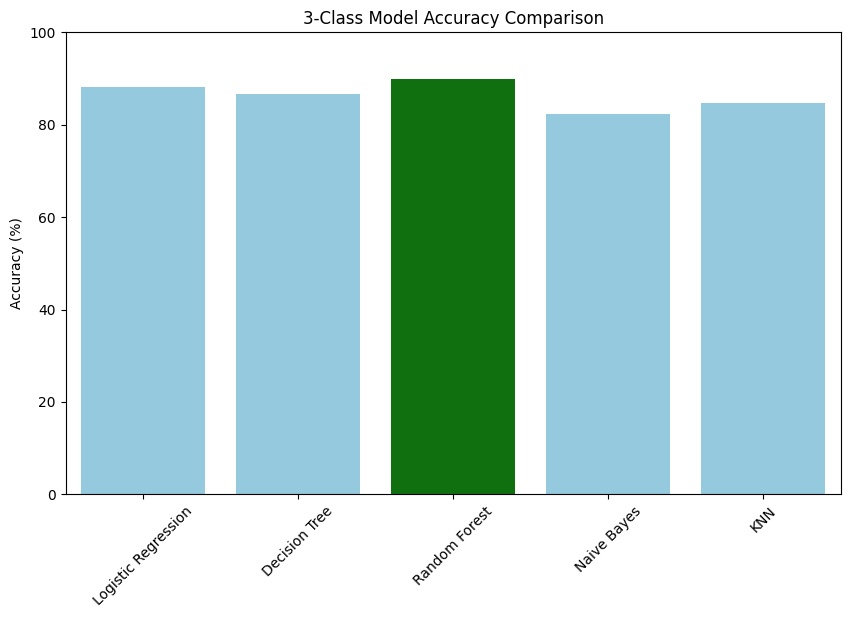

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for chart
models = ["Logistic Regression", "Decision Tree", 
          "Random Forest", "Naive Bayes", "KNN"]

accuracies = [acc_lr, acc_dt, acc_rf, acc_nb, acc_knn]

# Find best model index
best_index = accuracies.index(max(accuracies))

# Colors: highlight best model
colors = ['skyblue'] * len(models)
colors[best_index] = 'green'

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, hue=models, palette=colors, legend=False)
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("3-Class Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
